In [208]:
import pandas as pd 
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [209]:
import json
import pandas as pd
data = json.load(open('data.json',encoding="utf8"))

df= pd.DataFrame(data['PageResult']['Items'])[['Id','Title','AdditionalInfo', 'ImageId']]

In [229]:
df[['Title','Id']]

,Title,Id
0,RC-1 - Sekhmet Statue,3
1,RC-2 - Harpocrates,4
2,RC-3 - Osiris,5
3,RC-4 - Khonsu,6
4,RC-5 - Apis Bull,7
...,...,...
819,RC-297 - Ptah,5460
820,RC-251 - Rameses Ii Cartouche Fragment,5548
821,RC-1727 - False Door with Ibis,5550
822,RC-5187 - Scarab,5560


In [230]:
metadata = json.load(open('data/5550.json',encoding="utf8"))


In [231]:
metadata

{'Item': {'Title': '',
  'CreationDate': '',
  'ItemId': 'RC-1727',
  'CatalogItemDimension': {'Details': '54.2 X 45.7 X 7.3 CM'},
  'CatalogItemTags': [{'DictionaryItem': {'Id': 18679, 'Title': 'Funerary'}}],
  'CatalogItemHistory': {'CatalogItemHistoryOrigins': [],
   'CatalogItemHistoryMaterials': [{'DictionaryItem': {'Title': 'Limestone'}}]},
  'CatalogItemArt': {'Culture': {'Title': 'Egyptian'}},
  'CustomFields': [{'StringValue': 'JC/ 35mm/Page 68, Row 4, #34A (Blk/Wht)',
    'Metadata': {'ObjectType': 101,
     'FieldType': 10,
     'Name': 'Photograph',
     'Id': 4}},
   {'StringValue': 'Grey/ Light Brown/ Dark Brown/ White<br /><br />Text by: David P. Silverman',
    'Metadata': {'ObjectType': 101,
     'FieldType': 10,
     'Name': 'Online Description',
     'Id': 5}}],
  'ItemName': {'ObjectName': 'False Door with Ibis'}},
 'Title': 'RC-1727 - False Door with Ibis',
 'ChildItems': [],
 'RelatedRecords': [],
 'Attachments': [],
 'Urls': []}

In [234]:
metadata['Title']

'RC-1727 - False Door with Ibis'

In [214]:
metadata['Item']['CatalogItemArt']['Culture']['Title']

'Egyptian'

In [215]:
metadata['Item']['CustomFields'][1]['Metadata']['Name']

'Photograph'

In [216]:
metadata['Item']['CatalogItemHistory']['CatalogItemHistoryMaterials'][0]['DictionaryItem']['Title']

'Bronze'

In [217]:
metadata['Item']['CatalogItemTags'][0]['DictionaryItem']['Title']

'Sculpture'

In [235]:
metadata['Item']['CreationDate'] ==''

True

In [219]:
print(metadata['Item']['CustomFields'][0]['Metadata']['Name'])
print(metadata['Item']['CustomFields'][0]['StringValue'])


Period
Ptolemaic


In [220]:
new_data = {"Title":[], "Culture":[],"Date":[],"Period":[],"Material":[],"object_Type":[]}

In [242]:
new_data = {"Title":[], "Culture":[],"Dynasty": [],"Date":[],"Period":[],"Material":[],"object_Type":[]}

for index, row in df.iterrows():
    metadata = json.load(open(f'data/{row.Id}.json',encoding="utf8"))
    

    new_data['Title'].append(metadata['Title'])
    
    try:
        if metadata['Item']['CustomFields'][0]['Metadata']['Name'] == "Period":
             new_data['Period'].append(metadata['Item']['CustomFields'][0]['StringValue'])
        else:
            new_data['Period'].append(None)
            
    except IndexError:
         new_data['period'].append(None)
    
    try:
        if metadata['Item']['CustomFields'][1]['Metadata']['Name'] == "Dynasty":
            new_data['Dynasty'].append(metadata['Item']['CustomFields'][1]['StringValue'])
        else:
            new_data['Dynasty'].append(None)
            
    except IndexError:
         new_data['Dynasty'].append(None)
         
         
    if metadata['Item']['CreationDate'] =='':
        
         new_data['Date'].append(None)
    else:
        new_data['Date'].append(metadata['Item']['CreationDate'])    
         
    
    if metadata['Item']['CatalogItemArt']['Culture'] == None:
        new_data['Culture'].append(None)
    else:
        new_data['Culture'].append(metadata['Item']['CatalogItemArt']['Culture']['Title'])
        
    
    if metadata['Item']['CatalogItemHistory']['CatalogItemHistoryMaterials'] == []:
         new_data['Material'].append(None)
    else: 
        new_data['Material'].append(metadata['Item']['CatalogItemHistory']['CatalogItemHistoryMaterials'][0]['DictionaryItem']['Title'])
        
    
    if metadata['Item']['CatalogItemTags'] ==[]:
        new_data['object_Type'].append(None)
    else:
        new_data['object_Type'].append(metadata['Item']['CatalogItemTags'][0]['DictionaryItem']['Title'])
    

In [243]:
new_data=pd.DataFrame(new_data)
new_data.head()

,Title,Culture,Dynasty,Date,Period,Material,object_Type
0,RC-1 - Sekhmet Statue,Egyptian,None,332-30 BCE,Ptolemaic,Bronze,Sculpture
1,RC-2 - Harpocrates,Egyptian,None,305 - 30 BCE,Ptolemaic,Bronze,Sculpture
2,RC-3 - Osiris,Egyptian,None,332 - 31 BCE,Ptolemaic,Bronze,Sculpture
3,RC-4 - Khonsu,Egyptian,None,332 - 30 BCE,Ptolemaic,Bronze,Sculpture
4,RC-5 - Apis Bull,Egyptian,None,525 - 343 BCE,Late Period,Bronze,Sculpture


<BarContainer object of 25 artists>

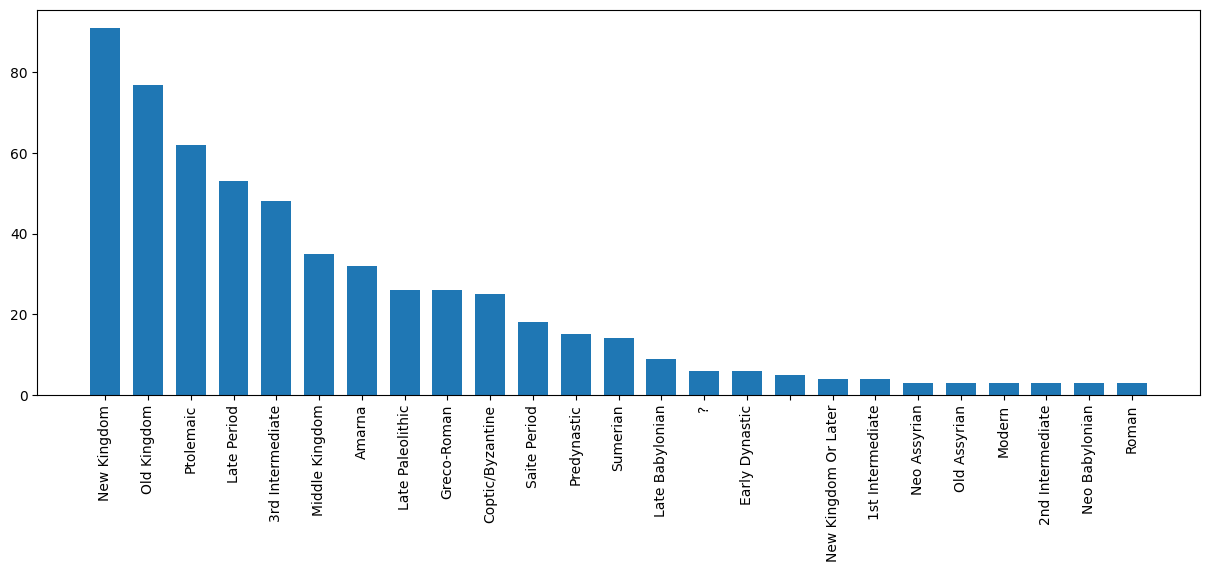

In [244]:
fig = plt.figure(figsize = (15, 5)) 
plt.xticks(rotation=90)
# creating the bar plot 
plt.bar(new_data['Period'].value_counts().index[:25], new_data['Period'].value_counts().values[:25], width = 0.7) 

<BarContainer object of 25 artists>

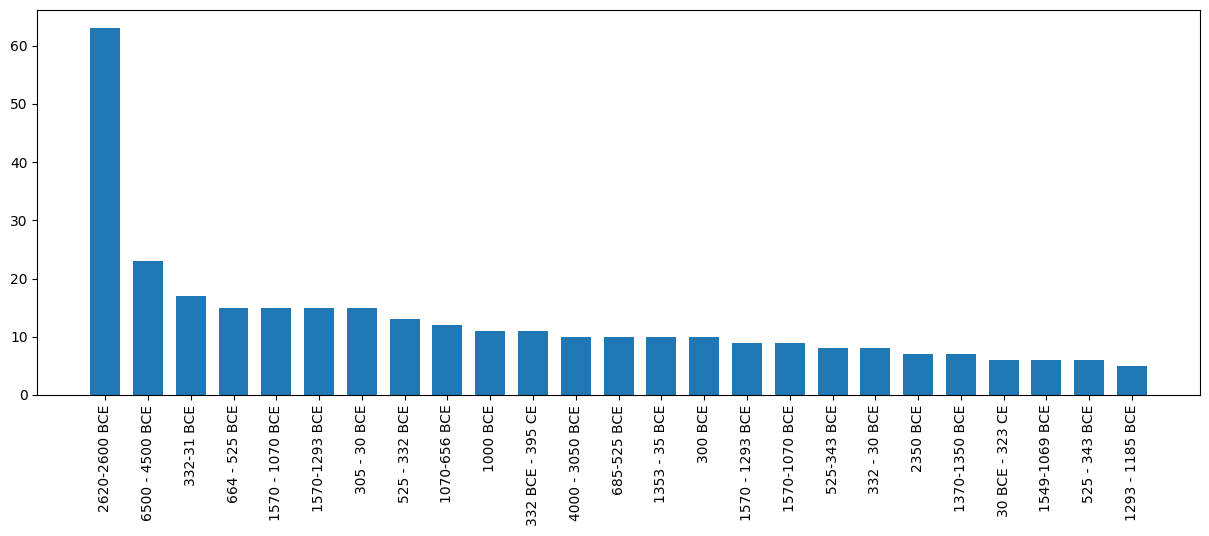

In [245]:
fig = plt.figure(figsize = (15, 5)) 
plt.xticks(rotation=90)
# creating the bar plot 
plt.bar(new_data['Date'].value_counts().index[:25], new_data['Date'].value_counts().values[:25], width = 0.7) 

In [252]:
new_data[new_data['Date'].isna() == new_data['Dynasty'].isna()]

,Title,Culture,Dynasty,Date,Period,Material,object_Type
7,RC-9 - Striding Young Horus,Egyptian,26TH,664 - 525 BCE,3rd Intermediate,Bronze,Sculpture
8,RC-10 - Uraeus,Egyptian,21-25th,1070-656 BCE,3rd Intermediate,Bronze,Sculpture
11,RC-15 - Pitcher/ Vase,Egyptian,18TH,1570 - 1293 BCE,New Kingdom,Banded Calcite,Vessels
12,RC-16 - Mirror/ Dancing Girl Handle,Egyptian,18TH,1570-1293 BCE,New Kingdom,Bronze,Toiletries
13,RC-17 - Headrest,Egyptian,3 - 6TH,2705-2250 BCE,Old Kingdom,Wood,Furniture
...,...,...,...,...,...,...,...
819,RC-297 - Ptah,Egyptian,None,None,None,Bronze,Sculpture
820,RC-251 - Rameses Ii Cartouche Fragment,Egyptian,None,None,None,Granite,Epigraphy
821,RC-1727 - False Door with Ibis,Egyptian,None,None,None,Limestone,Funerary
822,RC-5187 - Scarab,Egyptian,13TH,1784-1668 BCE,2nd Intermediate,Faience,Amulets


In [278]:
col=[]
num_nulls=[]

for i in  new_data:
 try:
   num_nulls.append(new_data[i].isna().value_counts()[1])
   col.append(new_data[i].isna().value_counts().index.name)
   
 except IndexError:
     continue

<BarContainer object of 6 artists>

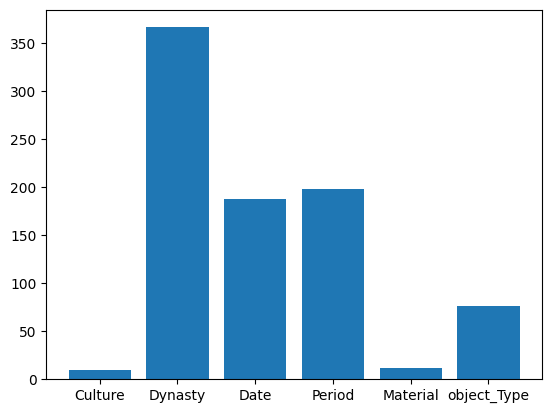

In [280]:
plt.bar(col,num_nulls)